# FLIGHT PRICE PREDICTION

## Problem Statement:

Airlines implement dynamic pricing for their tickets, and base their pricing decisions on demand estimation models. The reason for such a complicated system is that each flight only has a set number of seats to sell, so airlines have to regulate demand. In the case where demand is expected to exceed capacity, the airline may increase prices, to decrease the rate at which seats fill. On the other hand, a seat that goes unsold represents a loss of revenue, and selling that seat for any price above the service cost for a single passenger would have been a more preferable scenario.

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on -

1. Time of purchase patterns (making sure last-minute purchases are expensive)

2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights. This project contains three phase-

### 1. Data Collection:
I have done web scraping to collect the data of flight ticket prices from the well known website https://www.yatra.com/ where I found more features of flights compared to other websites and I fetch data for different locations. As per the requirement we need to build the model to predict the prices of different flight tickets.

### 2. Data Analysis:
After cleaning the data, we have to do some analysis on the data.

Do airfares change frequently? Do they move in small increments or in large jumps?
Do they tend to go up or down over time?
What is the best time to buy so that the consumer can save the most by taking the least risk?
Does price increase as we get near to departure date?
Is Indigo cheaper than Jet Airways?
Are morning flights expensive?

### 3. Model Building:
After collecting the data, we need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the bestmodel.

Follow the complete life cycle of data science. Include all the steps like

1. Data Cleaning

2. Exploratory Data Analysis

3. Data Pre-processing

4. Model Building

5. Model Evaluation

6. Selecting the best model

### Importing necessary libraries/dependencies.

In [1]:
# Preprocessing
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
from scipy.stats import zscore   # To remove outliers
# Evaluation Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
# ML Algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Importing collected dataset

In [2]:
# Reading excel file
df = pd.read_excel("Flight_Prices.xlsx")
df

,Unnamed: 0,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
0,0,Go First,08:45,10:55,2h 10m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
1,1,Go First,22:30,00:40,2h 10m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
2,2,Go First,14:20,16:35,2h 15m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
3,3,Go First,10:20,12:40,2h 20m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
4,4,Go First,18:05,20:25,2h 20m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
...,...,...,...,...,...,...,...,...,...,...
4475,4475,Air India,08:55,13:15,28h 20m,Lucknow,Jaipur,Free Meal,2 Stop(s),"13,977"
4476,4476,Air India,08:55,13:15,28h 20m,Lucknow,Jaipur,Free Meal,3 Stop(s),"13,977"
4477,4477,Air India,08:55,09:20,24h 25m,Lucknow,Jaipur,Free Meal,2 Stop(s),"16,287"
4478,4478,Air India,08:55,09:20,24h 25m,Lucknow,Jaipur,Free Meal,2 Stop(s),"16,287"


Here I am importing the colleced dataset which is in excel format and storing it into dataframe (df) for further usage. Here we can observe first 5 and last 5 rows of the dataset. There are 4480 rows and 10 columns in the dataframe. The dataset contains both numerical and categorical data. There are both dependent and independent variables present in the dataframe. We have our target variable "Price" which stores the price of the flight tickets and it is continuous in nature which makes this problem to be a "Regression Problem".

### Data Cleaning

In [3]:
# Dropping unwanted column
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()   # Displaying the dataframe

,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
0,Go First,08:45,10:55,2h 10m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
1,Go First,22:30,00:40,2h 10m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
2,Go First,14:20,16:35,2h 15m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
3,Go First,10:20,12:40,2h 20m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
4,Go First,18:05,20:25,2h 20m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"


Removed unwanted column "Unnamed: 0" from the dataset since it was only storing the index data and was not a worthy feature column for prediction. We can observe first 5 rows of the dataset.

### Exploratory Data Analysis(EDA)

In [4]:
# Checking the dimensions of the dataset
print("There are {} rows and {} columns in our dataframe".format(df.shape[0], df.shape[1]))

There are 4480 rows and 9 columns in our dataframe


In [5]:
# Checking the column names in the dataset
print("Columns present in our dataset:\n",df.columns)

Columns present in our dataset:
 Index(['Airline', 'Departure_time', 'Time_of_arrival', 'Duration', 'Source',
       'Destination', 'Meal_availability', 'Number_of_stops', 'Price'],
      dtype='object')


In [6]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
Airline,7
Departure_time,230
Time_of_arrival,241
Duration,427
Source,9
Destination,9
Meal_availability,11
Number_of_stops,5
Price,954


In [7]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            4480 non-null   object
 1   Departure_time     4480 non-null   object
 2   Time_of_arrival    4480 non-null   object
 3   Duration           4480 non-null   object
 4   Source             4480 non-null   object
 5   Destination        4480 non-null   object
 6   Meal_availability  4480 non-null   object
 7   Number_of_stops    4480 non-null   object
 8   Price              4480 non-null   object
dtypes: object(9)
memory usage: 315.1+ KB


* This info() method gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.
* The dataset contains object type data. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.
* Since counts of all the columns are same, which means there are no null values present in the dataset.

In [8]:
# Checking null values in the dataset
df.isnull().sum()

Airline              0
Departure_time       0
Time_of_arrival      0
Duration             0
Source               0
Destination          0
Meal_availability    0
Number_of_stops      0
Price                0
dtype: int64

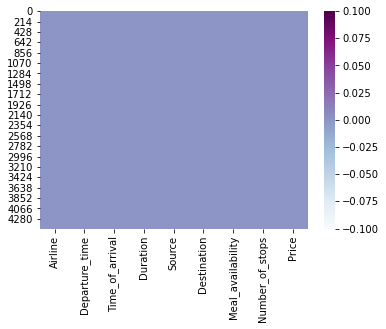

In [9]:
### Let's visualize the null values clearly
sns.heatmap(df.isnull(),cmap="BuPu")
plt.show()

### Value count function

In [10]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('*'*80)

Air India    1679
Vistara      1251
IndiGo        909
Go First      388
SpiceJet      170
Air Asia       81
StarAir         2
Name: Airline, dtype: int64
********************************************************************************
13:20    103
14:00    103
11:30     96
08:55     94
09:55     88
        ... 
18:25      1
18:20      1
10:50      1
15:05      1
07:40      1
Name: Departure_time, Length: 230, dtype: int64
********************************************************************************
20:45    96
19:40    87
13:15    81
20:00    79
20:55    71
         ..
02:30     1
13:35     1
06:35     1
00:45     1
02:05     1
Name: Time_of_arrival, Length: 241, dtype: int64
********************************************************************************
2h 10m     43
2h 45m     37
2h 15m     36
1h 10m     33
10h 30m    27
           ..
31h 40m     1
13h 11m     1
9h 24m      1
14h 04m     1
10h 49m     1
Name: Duration, Length: 427, dtype: int64
***********************************

These are the value counts of the columns present in the dataset.

### Feature Engineering

The columns Time_of_arrival and Departure_Time showing object data type which means python is not able to understand the type of data in this column due to some string values or categorical signs like ":" which we can observe in the value count function. Therefore, we have to convert this datatype into timestamp (datetime) to use them properly for prediction.

In [11]:
# Converting columns from object type to Datetime Type
df["Departure_time"] = pd.to_datetime(df["Departure_time"])
df["Time_of_arrival"] = pd.to_datetime(df["Time_of_arrival"])

In [12]:
#Checking the data types of all columns again
df.dtypes

Airline                      object
Departure_time       datetime64[ns]
Time_of_arrival      datetime64[ns]
Duration                     object
Source                       object
Destination                  object
Meal_availability            object
Number_of_stops              object
Price                        object
dtype: object

### Duration

In [13]:
#Extracting Duration column using Time_of_arrival and Departure_Time
Difference = (df["Time_of_arrival"]-df["Departure_time"])
Diff_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600  # Converting difference into seconds and Dividing it by 3600 (1hr=3600seconds)
    Diff_list.append(duration)
df["Duration"] = Diff_list

### Departure_time

Let's extract values from Departure_time. Departure time means when a flight leaves the airport and this column contains hours and minutes so we will extract hours and minutes from Departure_time.

In [14]:
# Departure time means the time when the journey starts from the source.

# Extracting Hours from Departure_time column
df["Departure_Hour"] = pd.to_datetime(df["Departure_time"]).dt.hour

# Extracting Minutes from Dep_Time column
df["Departure_Min"] = pd.to_datetime(df["Departure_time"]).dt.minute

Now we have extracted hour and minute from Departure_time column. Let's drop Departure_time column as it is of no use now.

In [15]:
# Dropping Departure_time column
df.drop("Departure_time",axis=1,inplace=True)

### Time_of_arrival

Similarly we can extract hours and minutes from Time_of_arrival column and dropping Time_of_arrival column.

In [16]:
# Arrival time is time of arrival at the destination.

# Extracting hour from Time_of_arrival column
df["Arrival_Hour"] = pd.to_datetime(df["Time_of_arrival"]).dt.hour

# Extracting Minutes from Arrival_Time column
df["Arrival_Min"] = pd.to_datetime(df["Time_of_arrival"]).dt.minute

# Dropping Arrival_Time column
df.drop("Time_of_arrival",axis=1,inplace=True)

Now we have extracted required data from the columns.

### Price

The target column should be in continuous numeric data type but it is appearing as object data type due to some categorical sign ",". Let's replace this sign by empty space and convert the type into float.

In [17]:
# Let's replace "," sign by empty space
df['Price'] = df['Price'].str.replace(',','')
# Let's convert data type of Price column to float
df['Price'] = df['Price'].astype('float')

### Meal_availability

From the value count function of Meal_availability we can observe "eCash 250", "Emissions: 109 Kg CO2" entry which does not belongs to meals so we can replace it as "None". Also, the other two entries "No meal fare" and "Free meal" belongs to same category that is they give same meaning so we can group them as well. We can also drop this column, but there are only few features in the dataset so, trying to retain the columns for prediction.

In [18]:
# Replacing "eCash250" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('eCash 250','None')

# Grouping the entries with same meaning
df['Meal_availability'] = df['Meal_availability'].replace('No Meal Fare','Free Meal')

# Replacing "Emissions: 109 Kg CO2" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 109 Kg CO2','None')

# Replacing "Emissions: 185 Kg CO2" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 185 Kg CO2','None')

# Replacing "Emissions: 142 Kg CO2" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 142 Kg CO2','None')

# Replacing "Emissions: 140 Kg CO2" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 140 Kg CO2','None')

# Replacing "Emissions: 112 Kg CO2" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 112 Kg CO2','None')

# Replacing "Emissions: 191 Kg CO2" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 191 Kg CO2','None')

# Replacing "Emissions: 252 Kg CO2" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 252 Kg CO2','None')

# Replacing "Emissions: 132 Kg CO2" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 132 Kg CO2','None')

### Number_of_stops

From the value count function of Number_of_stops we can observe the categorical values, let's replace them with numeric data.

In [19]:
# Replacing categorical values with numeric data
df.Number_of_stops.replace({"Non Stop": 0,"1 Stop": 1,"2 Stop(s)": 2,"3 Stop(s)": 3,"4 Stop(s)": 4},inplace = True)

Now we have successfully cleaned our data, let's have a look at dataframe.

In [20]:
# Checking dataset again
df

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,Go First,2.166667,New Delhi,Mumbai,None,0,5954.0,8,45,10,55
1,Go First,2.166667,New Delhi,Mumbai,None,0,5954.0,22,30,0,40
2,Go First,2.250000,New Delhi,Mumbai,None,0,5954.0,14,20,16,35
3,Go First,2.333333,New Delhi,Mumbai,None,0,5954.0,10,20,12,40
4,Go First,2.333333,New Delhi,Mumbai,None,0,5954.0,18,5,20,25
...,...,...,...,...,...,...,...,...,...,...,...
4475,Air India,4.333333,Lucknow,Jaipur,Free Meal,2,13977.0,8,55,13,15
4476,Air India,4.333333,Lucknow,Jaipur,Free Meal,3,13977.0,8,55,13,15
4477,Air India,0.416667,Lucknow,Jaipur,Free Meal,2,16287.0,8,55,9,20
4478,Air India,0.416667,Lucknow,Jaipur,Free Meal,2,16287.0,8,55,9,20


In [21]:
# Checking shape of data after cleaning 
df.shape

(4480, 11)

Now the dataset contains 4480 rows and 11 columns.

In [22]:
# Let's check the data types of the columns
df.dtypes

Airline               object
Duration             float64
Source                object
Destination           object
Meal_availability     object
Number_of_stops        int64
Price                float64
Departure_Hour         int64
Departure_Min          int64
Arrival_Hour           int64
Arrival_Min            int64
dtype: object

The dataframe has 3 types of data that is object, integer and float data types. We will encode the object data types before building the ML model.m

In [23]:
# Checking whether the target contains any space
df.loc[df['Price']==" "]

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min


There is no any empty space in any of the columns.

## Description of Dataset

In [24]:
# Statistical summary of dataset
df.describe()

,Duration,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
count,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000
mean,10.220216,1.306250,10467.698661,12.929464,26.101786,15.105580,28.533482
std,6.797684,0.739264,3699.135585,5.259841,17.546453,5.534141,18.207488
min,0.000000,0.000000,3361.000000,0.000000,0.000000,0.000000,0.000000
25%,4.416667,1.000000,7488.000000,9.000000,10.000000,11.000000,15.000000
50%,9.208333,1.000000,10345.000000,13.000000,25.000000,16.000000,30.000000
75%,15.416667,2.000000,13089.000000,17.000000,40.000000,20.000000,45.000000
max,23.916667,4.000000,31497.000000,23.000000,59.000000,23.000000,59.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things

* The counts of every column is same which means there are no missing values present in the dataset.
* The mean value is greater than the median(50%) in the columns Duration, Number_of_stops, and Price so we can say these columns are skewed to right.
* The median(50%) is bit greater than mean in Departure_Hour, Departure_Min, Arrival_Hour, Arrival_Hour and Arrival_Min which means these columns are skewed to left.
* From the description we can say the minimum price of the flight ticket is Rs.3361.00 and maximum price is Rs.31497.00 also the mean is 10467.698661.
* In summarizing the data we can observe that there is huge difference in maximum and 75% percentile in the columns Price, Duration, etc that means huge outliers present in those columns. These differences can also be seen in many other columns. So we need to remove outliers and skewness to get better model and prediction.

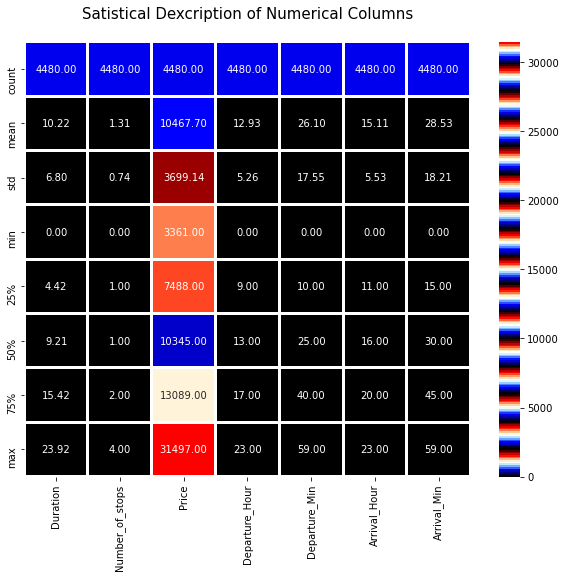

In [25]:
# Visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,8))
sns.heatmap(round(df.describe()[0:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="flag_r")
plt.title("Satistical Dexcription of Numerical Columns\n",fontsize=15)

plt.show()

From the heat map we can observe the statistical summary of the numerical features present in the dataset.

### Separating numerical and categorical columns

In [26]:
# Separating numerical and categorcal columns in the dataset

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns present in the dataset are:\n",categorical_col)

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("\nNumerical columns present in the dataset are:\n",numerical_col)

Categorical columns present in the dataset are:
 ['Airline', 'Source', 'Destination', 'Meal_availability']

Numerical columns present in the dataset are:
 ['Duration', 'Number_of_stops', 'Price', 'Departure_Hour', 'Departure_Min', 'Arrival_Hour', 'Arrival_Min']


These are the object data type and numerical type columns present in the dataset. "Number_of_stops" is categorical data since it is in integer type so its appearing as numeric data.

## Data Visualization

### Univariate Analysis

#### Plotting categorical Variables

Air India    1679
Vistara      1251
IndiGo        909
Go First      388
SpiceJet      170
Air Asia       81
StarAir         2
Name: Airline, dtype: int64 

1    2387
2    1367
0     486
3     229
4      11
Name: Number_of_stops, dtype: int64


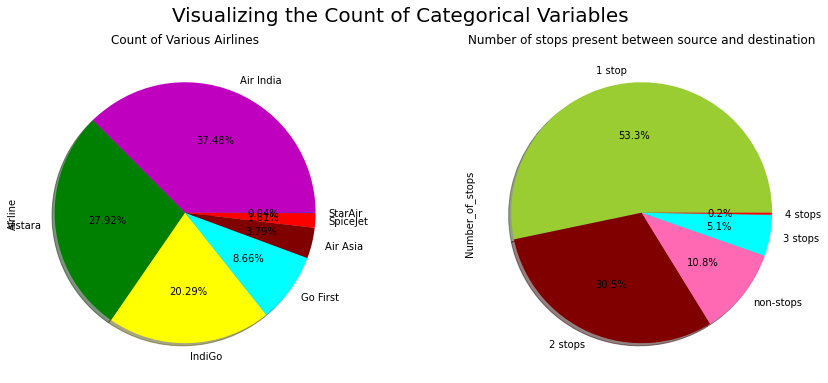

In [27]:
# Visualizing the count of categorical variables
plt.figure(figsize=(15,6))
plt.suptitle('Visualizing the Count of Categorical Variables',fontsize=20)

# Visualizing the count of Airlines
plt.subplot(1,2,1)
print(df["Airline"].value_counts(),"\n")
plt.title('Count of Various Airlines')
labels = ['Air India', 'Vistara', 'IndiGo', 'Go First', 'Air Asia', 'SpiceJet','StarAir']
colors = ["m", "green","yellow", "cyan", "maroon", "red", "blue"]
df['Airline'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True,labels=labels,fontsize=10,colors=colors)

# Visualizing the count of Number_of_stops
plt.subplot(1,2,2)
print(df['Number_of_stops'].value_counts())
plt.title('Number of stops present between source and destination')
labels = ['1 stop', '2 stops', 'non-stops', '3 stops', '4 stops']
colors = ["yellowgreen","maroon","hotpink","cyan","red"]
df['Number_of_stops'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,labels=labels,fontsize=10,colors=colors)
plt.show()

### Observations:
* **Airline:** From the pie plot we can infer that there are more number of flights of "Air India", "Vistara" and "Indigo" compared to others. Also, the count of Spicejet and StarAir flights are very less.
* **Number_of_stops:** From the above pie plot we can infer that 53% of the flights have only 1 stop during the journey and some of the flights (30.5%) have 2 stops and 10% are non stop flights whereas only few flights have 3 and 4 stops.

Free Meal    2932
None         1548
Name: Meal_availability, dtype: int64


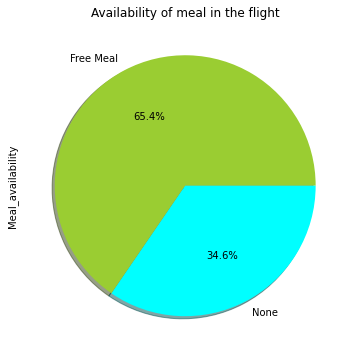

In [49]:
# Visualizing the availability of meal in the flight
plt.figure(figsize=(6,6))
print(df["Meal_availability"].value_counts())
plt.title('Availability of meal in the flight')
labels = ['Free Meal', 'None']
colors = ["yellowgreen","cyan"]
df['Meal_availability'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,labels=labels,fontsize=10,colors=colors)
plt.show()

### Observations:
* Meal_availability: Most of the flights providing free meals and only few flights are not providing any meals.

Mumbai       637
New Delhi    635
Bangalore    600
Chennai      522
Kolkata      510
Hyderabad    506
Goa          462
Lucknow      352
Jaipur       256
Name: Source, dtype: int64 

Mumbai       608
Bangalore    576
New Delhi    560
Hyderabad    519
Chennai      519
Kolkata      497
Goa          471
Lucknow      453
Jaipur       277
Name: Destination, dtype: int64


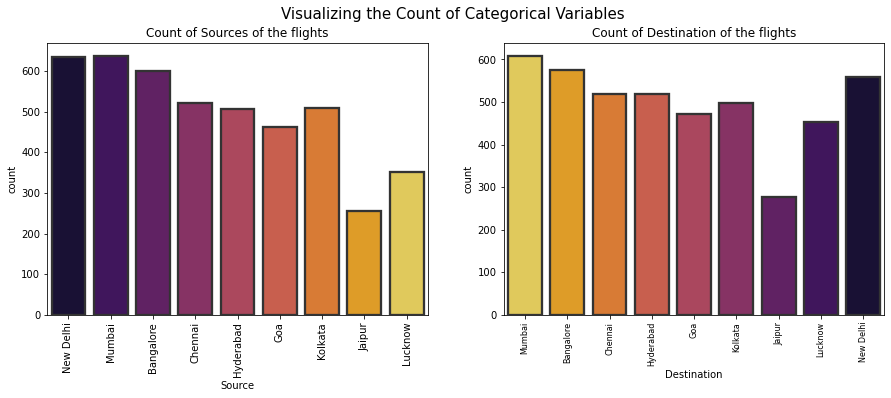

In [50]:
# Visualizing the count of categorical variables
plt.figure(figsize=(15,5))
plt.suptitle('Visualizing the Count of Categorical Variables',fontsize=15)

# Visualizing the count of Sources of the flights
plt.subplot(1,2,1)
print(df['Source'].value_counts(),"\n")
plt.title('Count of Sources of the flights')
sns.countplot('Source', data=df, palette="inferno",linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)

# Visualizing the count of Destination of the flights
plt.subplot(1,2,2)
print(df['Destination'].value_counts())
plt.title('Count of Destination of the flights')
sns.countplot('Destination', data=df, palette="inferno_r",linewidth=2.3, edgecolor=".2")
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

### Observations:
* **Source:** From the count plot we can observe more number of flights are from Mumbai, New Delhi, Bangalore, Hyderabad, Kolkata and Bangalore. Only few flights are from Jaipur.
* **Destination:** More number of flights are heading towards Mumbai, New Delhi and Bangalore. Only few flights are travelling to Jaipur.

## Distribution of skewness

### Plotting Numerical Variables

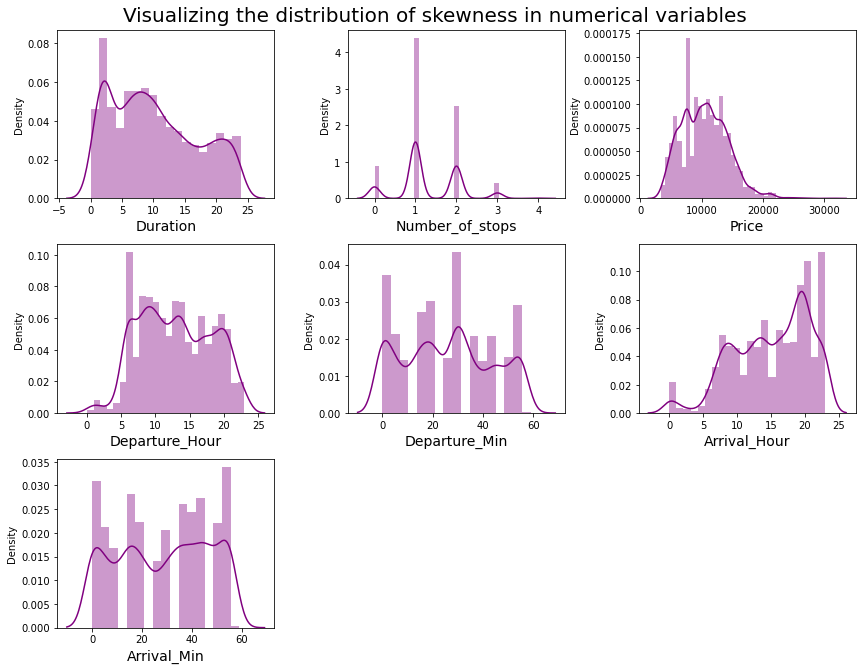

In [28]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column], color="purple")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

### Observations:
Above plot shows how the data has been distributed in each of the columns.

* From the distribution plot we can observe the columns are somewhat distributed normally as they have no proper bell shape curve.
* The columns like "Duration", "Number_of_stops" and "Price" are skewed to right as the mean value in these columns are much greater than the median(50%).
* Also the data in the column Arrival_Hour skewed to left since the mean values is less than the median.
* Since there is presence of skewness in the data, we need to remove skewness in the numerical columns to overcome with any kind of data biasness.

### Bivariate Analysis

### Visualizing Categorical Variables vs Target Variable Price

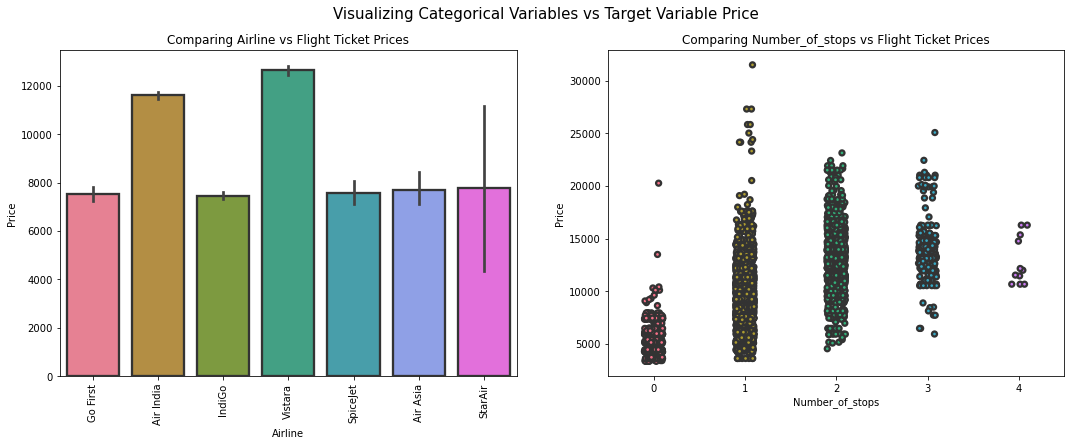

In [29]:
plt.figure(figsize = (18,6))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price",fontsize=15)

# Checking which Airline is expensive based on Price of tickets
plt.subplot(1,2,1)
plt.title("Comparing Airline vs Flight Ticket Prices")
sns.barplot(x= df['Airline'],y= df['Price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)

# Checking flights which have meals availability are expensive or not?
plt.subplot(1,2,2)
plt.title("Comparing Number_of_stops vs Flight Ticket Prices")
sns.stripplot(x = df['Number_of_stops'],y= df['Price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.show()

### Observations:
* **Airline vs Price:** From the bar plot we can notice "Vistara" and "Air India" airlines have highest ticket prices compared to other airlines.
* **Number_of_stops vs Price:** From the strip plot we can notice the flights which have 1 and 2 stops between source and destination have highest ticket prices compared to others. The airlines which have 4 stops during the journey have very less ticket price. So we can say as the stops increases, ticket price decreases.

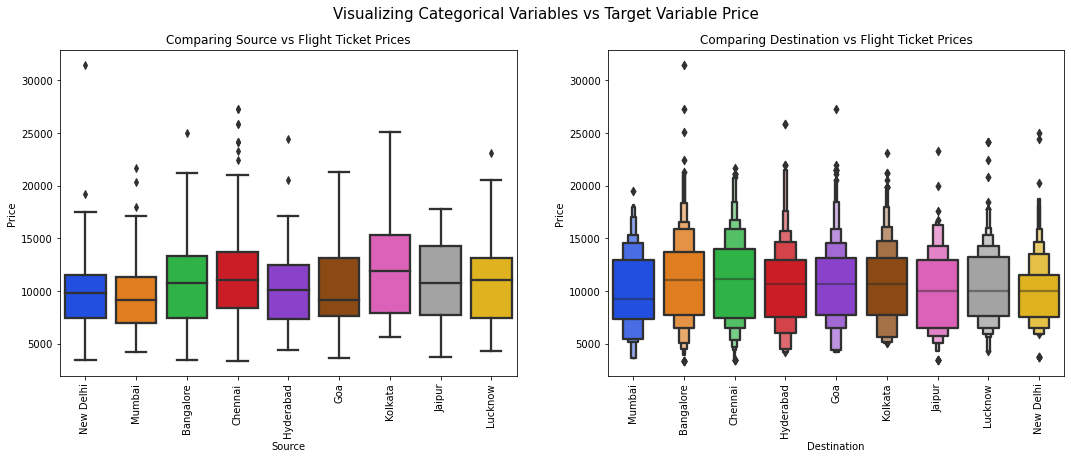

In [30]:
plt.figure(figsize = (18,6))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price\n",fontsize=15)

# Checking which source has highest ticket price
plt.subplot(1,2,1)
plt.title("Comparing Source vs Flight Ticket Prices")
sns.boxplot(x= df['Source'],y= df['Price'],palette = "bright",linewidth=2.3)
plt.xticks(rotation = 90)

# Checking how prices changes in each destination 
plt.subplot(1,2,2)
plt.title("Comparing Destination vs Flight Ticket Prices")
sns.boxenplot(x = df['Destination'],y= df['Price'],palette = "bright",linewidth=2.3)
plt.xticks(rotation = 90)
plt.show()


### Observations:
* **Source vs Price:** From the box plot we can observe the flights from Kolkata are having somewhat higher prices compared to other sources.
* **Destination vs Price:** From the boxen plot we can notice that the flights travelling to Goa have higher flight ticket prices.

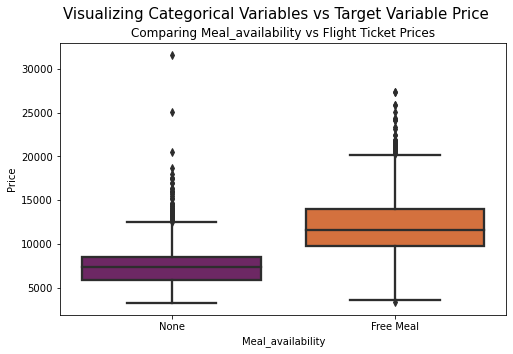

In [31]:
plt.figure(figsize = (8,5))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price\n",fontsize=15)
plt.title("Comparing Meal_availability vs Flight Ticket Prices")
sns.boxplot(x= df['Meal_availability'],y= df['Price'],palette = "inferno",linewidth=2.3)
plt.show()

### Observations:
* **Meal_availability vs Price:** The boxplot shows the flights having Free meal facility have high ticket prices.

### Visualizing Numerical Variables vs Target Variable Price

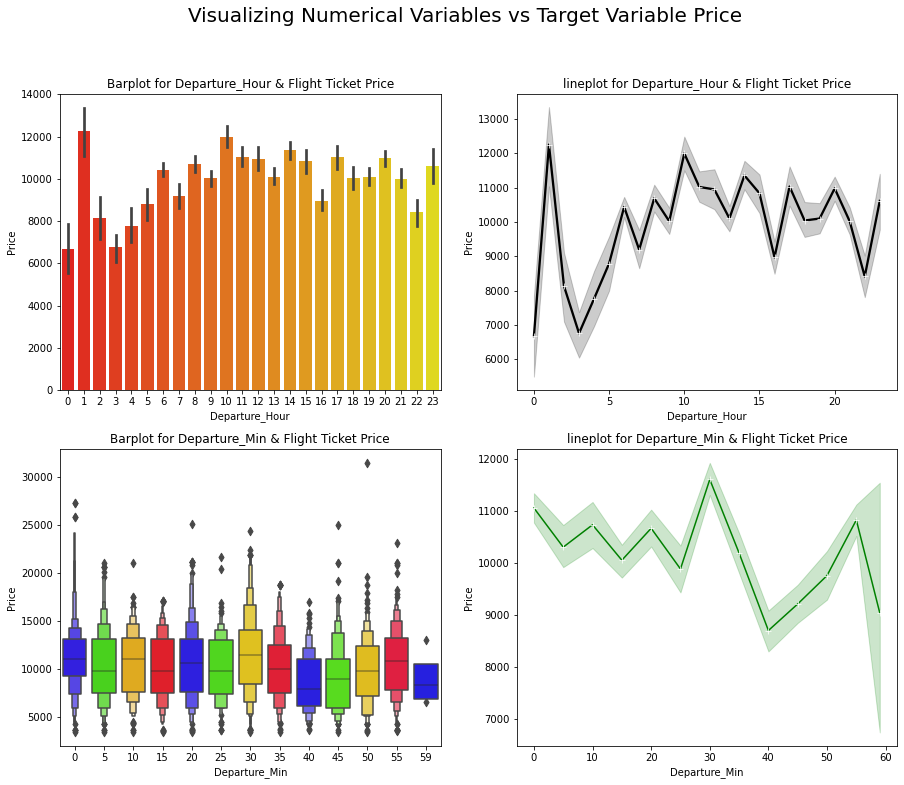

In [32]:
plt.figure(figsize = (15,12))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=20)

plt.subplot(2,2,1)
plt.title("Barplot for Departure_Hour & Flight Ticket Price")
sns.barplot(x= df['Departure_Hour'],y= df['Price'],palette = "autumn",linewidth=2.3)

plt.subplot(2,2,2)
plt.title("lineplot for Departure_Hour & Flight Ticket Price")
sns.lineplot(x = df['Departure_Hour'],y= df['Price'],marker="+",color='k',linewidth=2.3)

plt.subplot(2,2,3)
plt.title("Barplot for Departure_Min & Flight Ticket Price")
sns.boxenplot(x='Departure_Min',y='Price',data=df,palette = "prism",color='k')

plt.subplot(2,2,4)
plt.title("lineplot for Departure_Min & Flight Ticket Price")
sns.lineplot(x='Departure_Min',y='Price',data=df,marker="+",color='g')

plt.show()

### Observations:
* **Departure_Hour vs Price:** From the bar plot and line plot we can see that there are some flights departing in the midnight 1 AM having most expensive ticket prices compared to late morning flights. We can also observe the flight ticket prices are higher during afternoon (may fluctuate) and it decreases in the evening.
* **Departure_Min vs Price:** The boxen plot and line plot gives there is no significant difference between price and departure min.

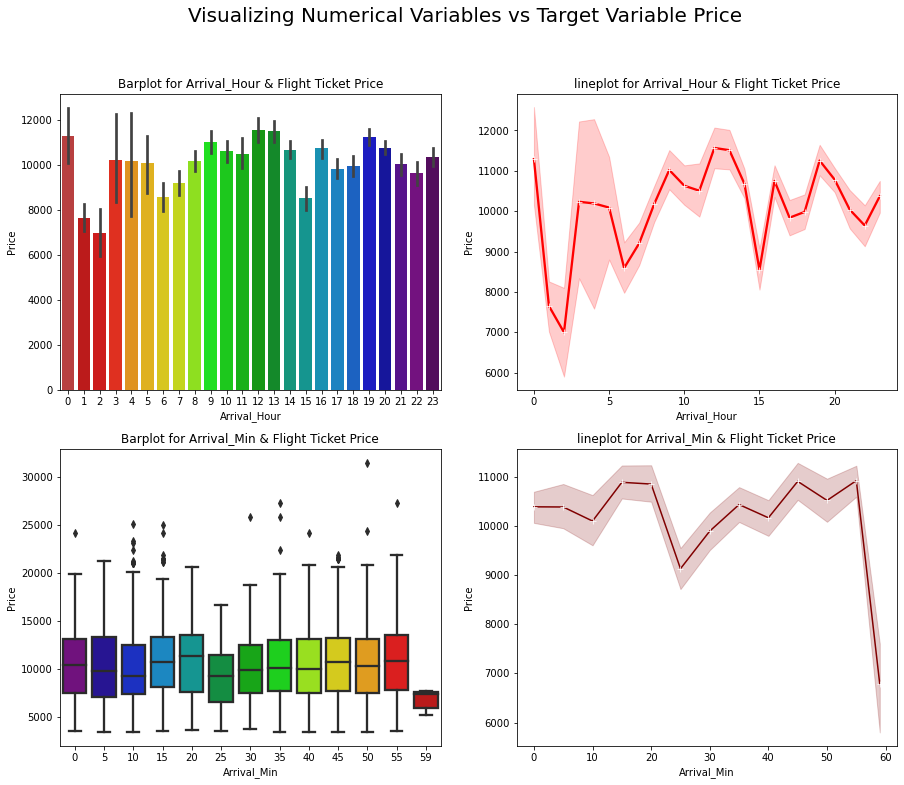

In [33]:
plt.figure(figsize = (15,12))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=20)

plt.subplot(2,2,1)
plt.title("Barplot for Arrival_Hour & Flight Ticket Price")
sns.barplot(x= df['Arrival_Hour'],y= df['Price'],palette = "nipy_spectral_r",linewidth=2.3)

plt.subplot(2,2,2)
plt.title("lineplot for Arrival_Hour & Flight Ticket Price")
sns.lineplot(x = df['Arrival_Hour'],y= df['Price'],marker="+",color='r',linewidth=2.3)

plt.subplot(2,2,3)
plt.title("Barplot for Arrival_Min & Flight Ticket Price")
sns.boxplot(x='Arrival_Min',y='Price',data=df,palette = "nipy_spectral",linewidth=2.3)

plt.subplot(2,2,4)
plt.title("lineplot for Arrival_Min & Flight Ticket Price")
sns.lineplot(x='Arrival_Min',y='Price',data=df,marker="+",color='maroon')

plt.show()

### Observations:
* **Arrival_Hour vs Price:** From the bar plot and line plot we can observe that very few flights are arriving in the early morning so they have very less ticket price. Also, the flights which are arriving in the afternoon and evening have somewhat higher price. So, we can conlude this column has some positive correlation with price.
* **Arrival_Min vs Price:** There is no significant difference between this feature and price. We can say flight ticket prices are not much dependent on the Arrival_min.

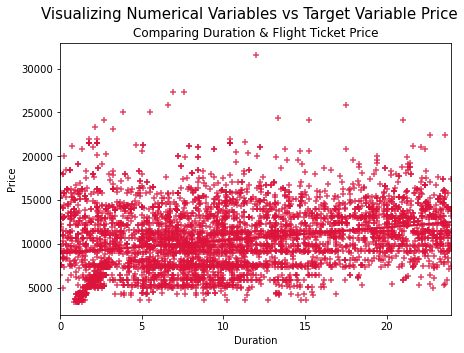

In [34]:
# Visualizing duration and price
plt.figure(figsize = (7,5))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Price",fontsize=15)

plt.title("Comparing Duration & Flight Ticket Price")
sns.regplot(x= df['Duration'],y= df['Price'],marker="+",color='crimson')
plt.show()

### Observations:
* **Duration vs Price:**From the reg plot we can observe some positive linear relation between Duration and Price.

Till now we have checked the relation between the independent variables and dependent variable that is our target column "Price". Now let's check the relation between two independent variables and compare each of them with others.

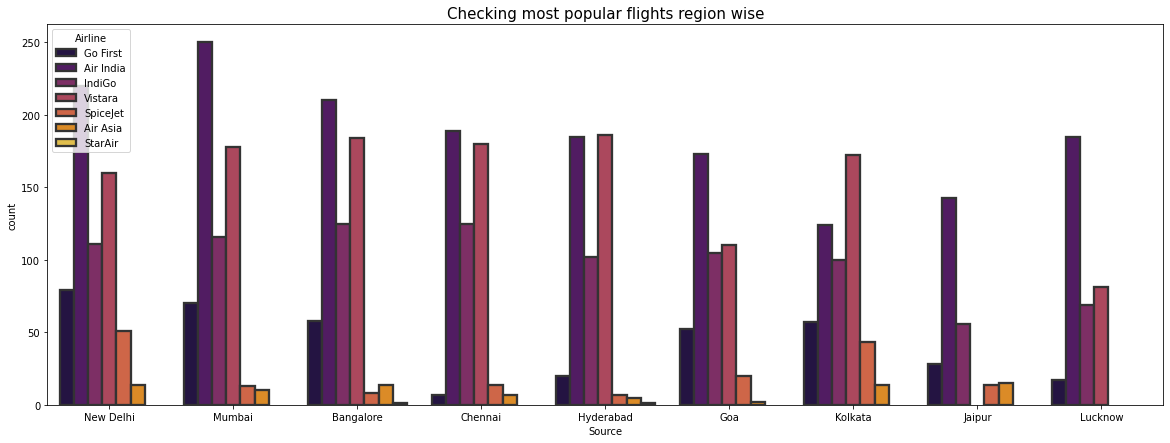

In [35]:
# Lets chcek the most popular flight region wise
plt.figure(figsize=(20,7))
sns.countplot(x = "Source", hue = "Airline", data = df, palette = "inferno",linewidth=2.3, edgecolor=".2")
plt.title("Checking most popular flights region wise",fontsize=15)
plt.show()

### Observations:
* **Source vs Airline:** The plot showing the region wise count of airlines which tells us that Jaipur source is not having Vistara flights and it has Air India flights in higher count compared to other sources. Other sources have Go First, Air India, Vistara and Indigo flights with higher count.

### Multivariate Analysis

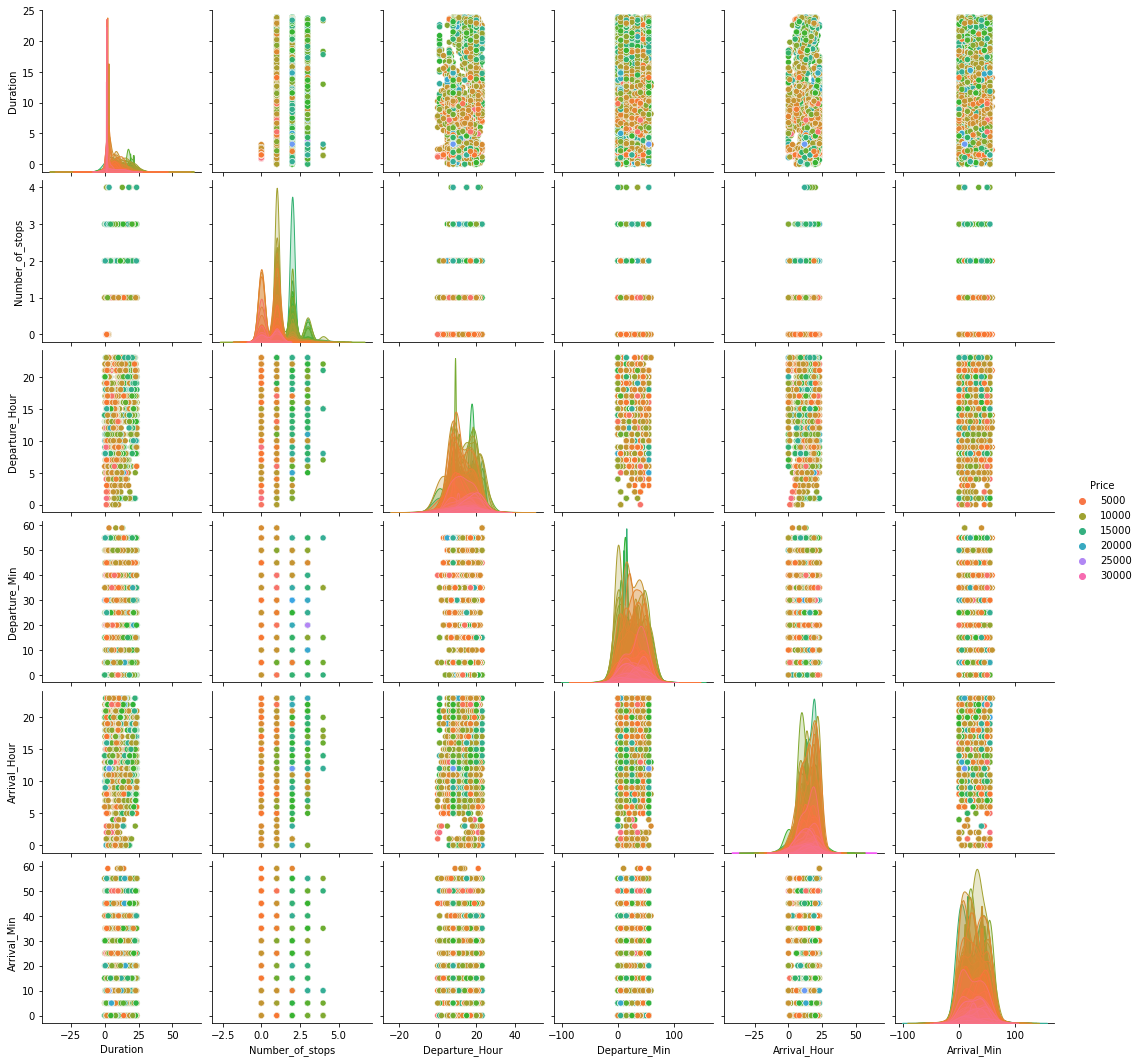

In [38]:
sns.pairplot(df,hue="Price",palette="husl")
plt.show()

* This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Price". Here we can observe the relation between the features and label.
* Here we can observe the correaltion between the features and on the diagonal we can notice the distribution plot which shows whether the column has skewness or not.

### EDA Conclusion:

### 1. Do airfares change frequently? Do they move in small increments or in large jumps?

* Flight ticket prices change during the morning and evening time of the day. From the distribution plots we came to know that the prices of the flight tickets are going up and down, they are not fixed at a time. Also, from this graph we found prices are increasing in large amounts.

### 2. Do they tend to go up or down over time?

* Some flights are departing in the midnight 1 AM having most expensive ticket prices compared to late morning flights. As the time goes the flight ticket fares increased and daytime flight fares keep on fluctuating. Also from categorical and numerical plots we found that the prices are tending to go up as the time is approaching from morning to evening.

### 3. What is the best time to buy so that the consumer can save the most by taking the least risk?

* From the categorical plots (bar and box) we came to know that early morning and late night flights are cheaper compared to working hours.

### 4. Does price increase as we get near to departure date?

* From the categorical plots we found that the flight ticket prices increases as the person get near to departure time. That is last minute flights are very expensive.

### 5. Is Indigo cheaper than Jet Airways?

* From the bar plot we got to know that both Indigo and Spicejet airways almost having same ticket fares.

### 6. Are morning flights expensive?

* Not all flights are expensive during morning, only few flights departing in the midnight 1 AM are expensive. Apart from this the flight ticket fares are less compared to other timing flight fares.

## Data Pre-processing

### Identifying the outliers

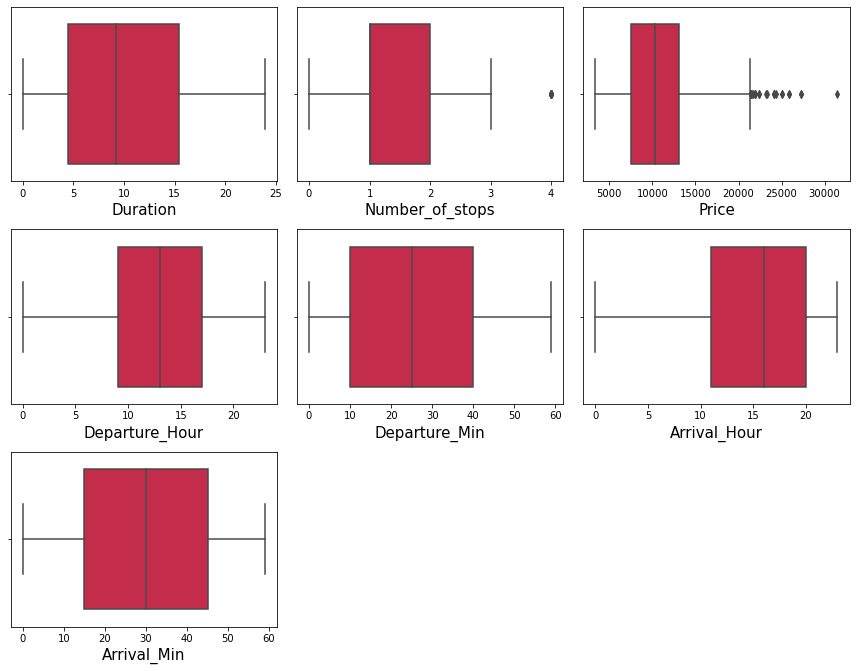

In [39]:
# Identifying the outliers using boxplot

plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color="crimson")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

* The outliers present in Number_of_stops and "Price" columns.
* Since Price is our target column and Number_of_stops is our categorical variable so no need to remove outliers in this columns. Finally there is no need to remove outliers in the dataset.

## Checking for skewness in the data

In [40]:
# Checking the skewness
df.skew()

Duration           0.383748
Number_of_stops    0.349618
Price              0.503185
Departure_Hour     0.073197
Departure_Min      0.095891
Arrival_Hour      -0.533200
Arrival_Min       -0.093453
dtype: float64

We can find the skewness only in the Price column. Price is our target variable we should not loose any data so, no need remove skewness in this column.

## Encoding the categorical columns using Label Encoder Method

In [45]:
print("Categorical columns are:",categorical_col)

Categorical columns are: ['Airline', 'Source', 'Destination', 'Meal_availability']


In [46]:
# Converting categorical data into numerical using Label Encoder method
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [47]:
# Displaying dataframe after encoding 
df

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,2,2.166667,8,7,1,0,5954.0,8,45,3.162278,55
1,2,2.166667,8,7,1,0,5954.0,22,30,0.000000,40
2,2,2.250000,8,7,1,0,5954.0,14,20,4.000000,35
3,2,2.333333,8,7,1,0,5954.0,10,20,3.464102,40
4,2,2.333333,8,7,1,0,5954.0,18,5,4.472136,25
...,...,...,...,...,...,...,...,...,...,...,...
4475,1,4.333333,6,4,0,2,13977.0,8,55,3.605551,15
4476,1,4.333333,6,4,0,3,13977.0,8,55,3.605551,15
4477,1,0.416667,6,4,0,2,16287.0,8,55,3.000000,20
4478,1,0.416667,6,4,0,2,16287.0,8,55,3.000000,20


Now we have converted the categorical columns into numerical columns using label encoding method.

### Correlation between the target variable and independent variables using HEAT map

In [48]:
# Checking the correlation between features and the target
cor = df.corr()
cor

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.017441,-0.039485,-0.011416,-0.099489,-0.014562,0.163977,-0.014108,0.179882,0.110856,0.191600
Duration,-0.017441,1.000000,-0.017410,-0.058104,-0.287751,0.336992,0.272119,0.182171,-0.052553,-0.089097,0.047393
Source,-0.039485,-0.017410,1.000000,-0.233944,0.028616,-0.049919,-0.111319,0.099167,-0.040929,0.006483,0.015558
Destination,-0.011416,-0.058104,-0.233944,1.000000,0.041992,-0.069335,-0.097406,-0.015816,0.010446,-0.023888,-0.045958
Meal_availability,-0.099489,-0.287751,0.028616,0.041992,1.000000,-0.465511,-0.583959,-0.123059,0.097397,-0.059603,-0.052464
Number_of_stops,-0.014562,0.336992,-0.049919,-0.069335,-0.465511,1.000000,0.627941,-0.002826,-0.036501,0.083717,-0.016636
Price,0.163977,0.272119,-0.111319,-0.097406,-0.583959,0.627941,1.000000,0.001532,-0.059965,0.022614,0.028008
Departure_Hour,-0.014108,0.182171,0.099167,-0.015816,-0.123059,-0.002826,0.001532,1.000000,-0.119049,-0.063523,0.008247
Departure_Min,0.179882,-0.052553,-0.040929,0.010446,0.097397,-0.036501,-0.059965,-0.119049,1.000000,0.034057,0.044631
Arrival_Hour,0.110856,-0.089097,0.006483,-0.023888,-0.059603,0.083717,0.022614,-0.063523,0.034057,1.000000,-0.024472


This gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.

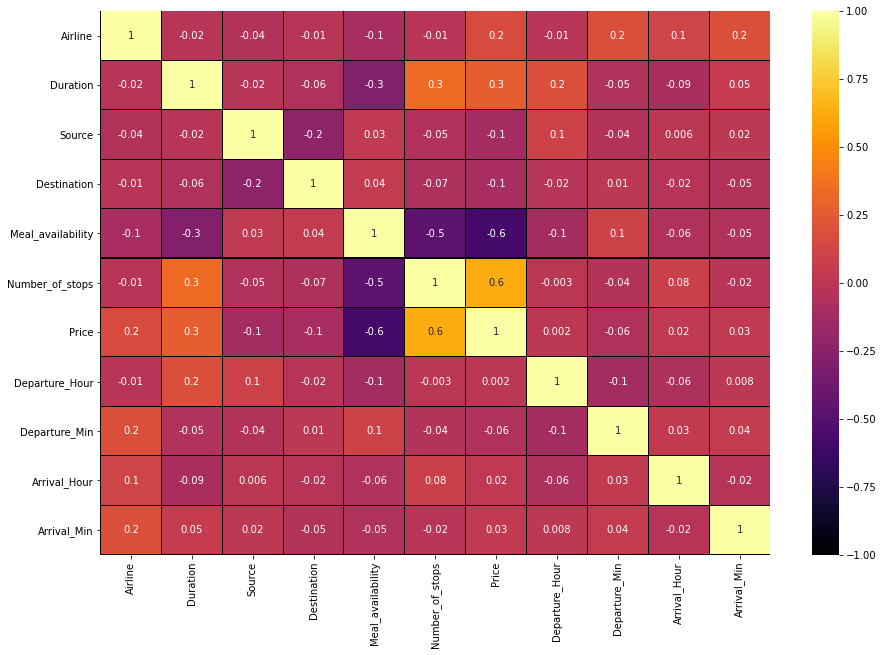

In [49]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))    
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="inferno")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

* This heat map contains both positive and negative correlation.
* The features Number_of_stops, Duration Arrival_Hour and Airline are highly positively correlated with the target column compared to other features.
* The other features have very less correlation with the target column.
* From the map we can also observe there is no multicollinearity issue exists.

In [50]:
cor['Price'].sort_values(ascending=False)

Price                1.000000
Number_of_stops      0.627941
Duration             0.272119
Airline              0.163977
Arrival_Min          0.028008
Arrival_Hour         0.022614
Departure_Hour       0.001532
Departure_Min       -0.059965
Destination         -0.097406
Source              -0.111319
Meal_availability   -0.583959
Name: Price, dtype: float64

Here we can notice the positive and negative correlation between features and label in the descending order.

### Visualizing the correlation between label and features using bar plot

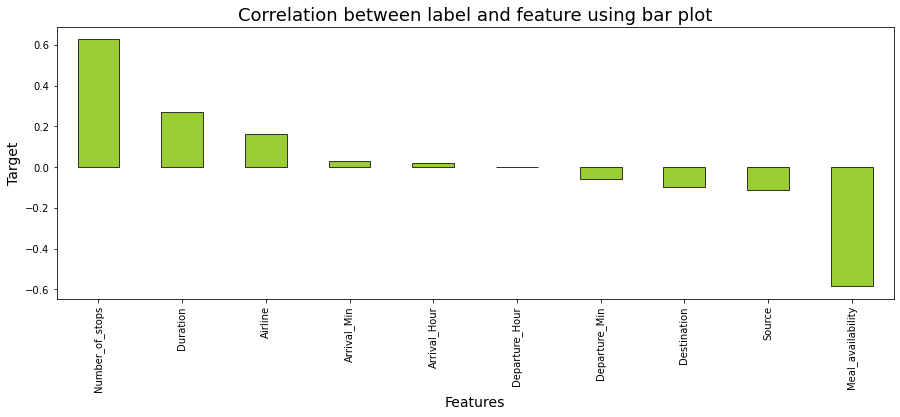

In [51]:
plt.figure(figsize=(15,5))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='yellowgreen',edgecolor=".2")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

From the bar plot we can clearly observe the positive and negative correlation between the label and features. Here the column "Departure_Hour" has less correlation with the label compared to other features, we can drop this column if necessary but for now let's keep it as it is.

### Separating the feature and label into x and y

In [52]:
x = df.drop("Price", axis=1)
y = df["Price"]

We have separated both dempendent and independent variables.

In [54]:
# Dimension of x and y
x.shape, y.shape

((4480, 10), (4480,))

After data cleaning and preprocessing we are left with 10 columns which we are using to train our machine learning model for prediciting the ticket price of the flights.

### Feature Scaling Using StandardScaler

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,-0.475505,-1.184881,1.420874,1.092998,1.376247,-1.767157,-0.937293,1.077159,-0.714009,1.453769
1,-0.475505,-1.184881,1.420874,1.092998,1.376247,-1.767157,1.724681,0.222190,-4.329012,0.629840
2,-0.475505,-1.172621,1.420874,1.092998,1.376247,-1.767157,0.203553,-0.347789,0.243645,0.355197
3,-0.475505,-1.160360,1.420874,1.092998,1.376247,-1.767157,-0.557011,-0.347789,-0.368975,0.629840
4,-0.475505,-1.160360,1.420874,1.092998,1.376247,-1.767157,0.964117,-1.202758,0.783374,-0.194089


We have scaled the data using StandardScaler method to overcome with the issue of data biasness and displayed the data of independent variables after scaling.

## Building Machine Learning Models

### Finding the Best Random State and Accuracy

In [56]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8071263201074919  on Random_state  157


With the help of random state selection process we have found our random state to be 157 amongst 1-200 with best accuracy as 80.71% using Random Forest Regressor.

### Feature Importance

In [58]:
# Lets chkeck the feature importance using Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
Number_of_stops,0.285
Meal_availability,0.238
Source,0.084
Duration,0.081
Destination,0.077
Arrival_Hour,0.053
Departure_Hour,0.051
Airline,0.049
Departure_Min,0.045


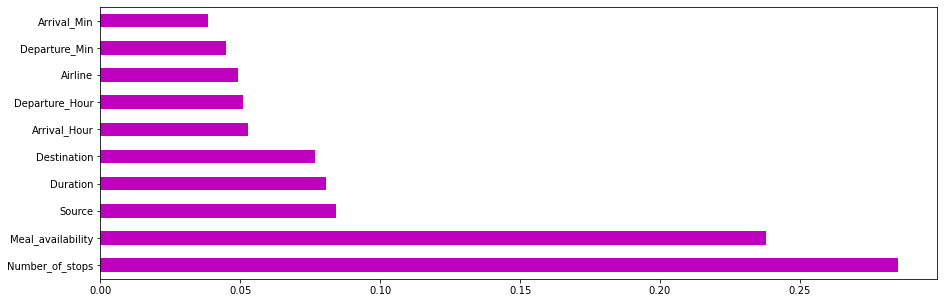

In [59]:
plt.figure(figsize=(15,5))
importances=pd.Series(RFR.feature_importances_,index=x.columns)
importances.nlargest(30).plot(kind='barh',color="m")
plt.show()

Here with the help of RandomForestRegressor we are able to list down the importance given to a column as per it's involvement in predicting our label. Here the column "Number_of_stops", "Meal_availability" and "Source" contributing more for prediction which means these features are important for the predictions.

### Creating new train test split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=157)

I am taking 30 percent of the complete dataset for training purpose and the remaining 70 percent will be used to train the machine learning models using the random state.

## ML Regression Algorithms with Evaluation Metrics

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## i) Decision Tree Regressor

R2_Score: 62.47500120137741
Mean Absolute Error: 1191.4439484126985
Mean Squared Error: 5013618.234829696
Root Mean Squared Error: 2239.11103673527


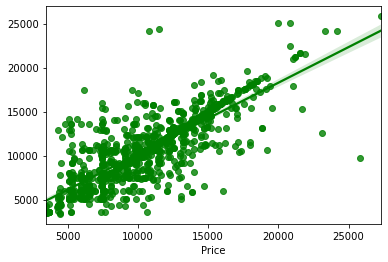

In [81]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
R2_score = r2_score(y_test,predDTR)*100    
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predDTR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predDTR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Visualizing the predicted values
sns.regplot(y_test,predDTR,color="g")
plt.show()

* Created Decision Tree Regressor model and checked for its evaluation metrics. The model is giving R2 score as 62.47%.
* From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that the model has given.

## ii) Random Forest Regressor

R2_Score: 79.99435634295975
Mean Absolute Error: 1057.3535249521683
Mean Squared Error: 2672902.413047479
Root Mean Squared Error: 1634.9013465795051


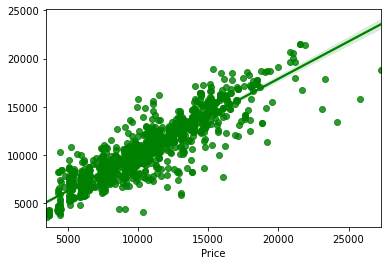

In [82]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
R2_score = r2_score(y_test,predRFR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predRFR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predRFR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predRFR))) 

# Visualizing the predicteed values
sns.regplot(y_test,predRFR,color="g")
plt.show()

* Created Random Forest Regressor model and checked for it's evaluation metrics. The model is giving R2 score as 79.99%.
* From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that our model has given.

## iii) Extra Trees Regressor

R2_Score: 82.73506978424913
Mean Absolute Error: 901.1432552083335
Mean Squared Error: 2306722.7641304545
Root Mean Squared Error: 1518.7899012471917


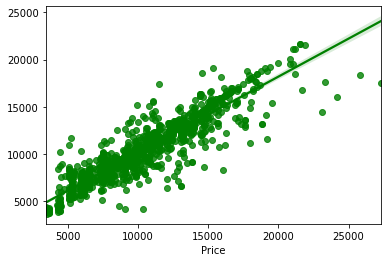

In [83]:
# Checking R2 score for Extra Trees Regressor
XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
R2_score = r2_score(y_test,predXT)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXT))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXT))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXT))) 

# Visualizing the predicteed values
sns.regplot(y_test,predXT,color="g")
plt.show()

* Created Extra Trees Regressor model and checked for its evaluation metrics. The model is giving R2 score as 82.73%.
* From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that our model has given.

## iv) GradientBoosting Regressor

R2_Score: 70.45800511179338
Mean Absolute Error: 1432.069046242228
Mean Squared Error: 3947029.6870521167
Root Mean Squared Error: 1986.713287581305


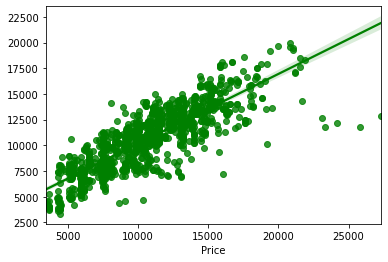

In [84]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
R2_score = r2_score(y_test,predGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predGB))) 

# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="g")
plt.show()

* Created GradientBoosting Regressor model and checked for its evaluation metrics. The model is giving R2 score as 70.45%.
* From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

## v) Extreme Gradient Boosting Regressor (XGB)

R2_Score: 79.40480819541678
Mean Absolute Error: 1143.1297981625512
Mean Squared Error: 2751670.4193755705
Root Mean Squared Error: 1658.8159691103683


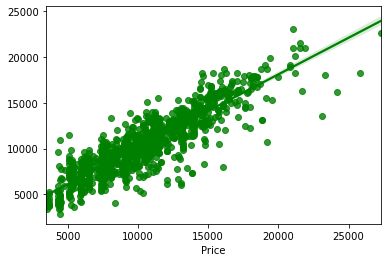

In [85]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb
XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)

# prediction
predXGB=XGB.predict(x_test)
R2_score = r2_score(y_test,predXGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXGB))) 

# Visualizing the predicteed values
sns.regplot(y_test,predXGB,color="g")
plt.show()

* Created XGB Regressor model and checked for its evaluation metrics. The model is giving R2 score as 79.40%.
* From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

## vi) Bagging Regressor

R2_Score: 77.02551591832567
Mean Absolute Error: 1146.8291441197691
Mean Squared Error: 3069561.519397439
Root Mean Squared Error: 1752.0164152762493


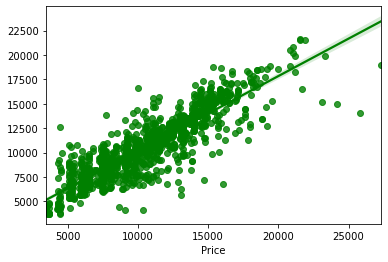

In [86]:
# Checking R2 score for BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
R2_score = r2_score(y_test,predBR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predBR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predBR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predBR))) 

# Visualizing the predicteed values
sns.regplot(y_test,predBR,color="g")
plt.show()

* Created Bagging Regressor model and checked for its evaluation metrics. The model is giving R2 score as 77.02%.
* From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

## Model Selection

**From the above created models, Extra Trees Regressor algorithm has high R2 score and less RMSE value. So, we can conclude that "Extra Trees Regressor" as the best fitting model. Let's try to increase our model score by tuning the best model using different types of hyper parameters.**

## Hyper Parameter Tuning

In [87]:
# Let's Use the GridSearchCV to find the best paarameters in XGBRegressor
from sklearn.model_selection import GridSearchCV

# Extra Trees Regressor
parameter = {'n_estimators':[10,100,1000],
             'criterion':['squared_error','mse','absolute_error','mae'],
             'min_samples_split': [1,2,3,4],
             'max_features':['auto','sqrt','log2'],
             'n_jobs':[-2,-1,1,2]}

I have used 5 Extra Trees Regressor parameters to be saved under the variable "parameter" that will be used in GridSearchCV for finding the best output.

In [89]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

Assigning a variable to the GridSearchCV function after entering all the necessary inputs.

In [90]:
# Running GridSearchCV
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [10, 100, 1000],
                         'n_jobs': [-2, -1, 1, 2]})

Now we use our training data set to make the GridSearchCV aware of all the hyper parameters that needs to be applied on our best model.

In [91]:
# Finding best parameters
GCV.best_params_

{'criterion': 'mae',
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 1000,
 'n_jobs': 1}

This gives us the list of best parameters which will be used further in our final model creation.

R2_Score: 82.52142824898986
Mean absolute error: 845.571838169643
Mean squared error: 2335266.8582326584
Root Mean Squared error: 1528.1579951800331


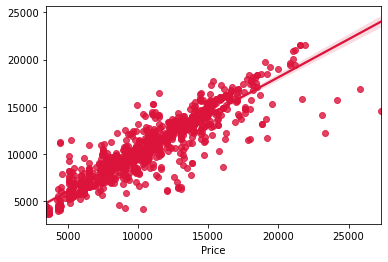

In [93]:
# Creating final model
Flight_price_model = ExtraTreesRegressor(criterion='mae',max_features='auto',min_samples_split=4,n_estimators=1000,n_jobs=1)

# Prediction
Flight_price_model.fit(x_train, y_train)
pred = Flight_price_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

# Metric Evaluation
print('Mean absolute error:',metrics.mean_absolute_error(y_test, pred))
print('Mean squared error:',metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

# Visualizing the predicted values
sns.regplot(y_test,pred,color="crimson")
plt.show()

* We have successfully incorporated the hyper parameter tuning using best parameters of Extra Trees Regressor and the R2 score of the model has been increased after hyperparameter tuning and received the R2 score as 77.61% which is very good.
* From the graph we can observe how our final model is mapping. In the graph we can observe the best fit line which is our actual dataset and the dots are the predictions that our best final model has given.

## Saving the Final model

In [94]:
# Saving the model using joblib library 
import joblib
joblib.dump(Flight_price_model,"Flight_Ticket_Price_Prediction.pkl")

['Flight_Ticket_Price_Prediction.pkl']

I am using the joblib option to save the final regression model in the form of .pkl.

## Loading the saved model and predicting Flight Ticket Price

In [95]:
# Loading the saved model
Model=joblib.load("Flight_Ticket_Price_Prediction.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([ 7729.8415,  6006.638 , 13755.7995, ..., 17725.3105, 12897.3385,
       11530.412 ])

These are the predicted price of the flight tickets.

## Creating DataFrame for the predicted values

In [96]:
Predicted_Flight_Ticket_Price = pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])
Predicted_Flight_Ticket_Price

,0,1,2,3,4,5,6,7,8,9,...,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343
Predicted,7729.8415,6006.638,13755.7995,12979.303,6039.0465,15673.517,6216.1345,3701.701,6624.627,5758.2035,...,10140.9065,11520.1995,20900.7155,11095.445,12890.72,14249.0,7882.6165,17725.3105,12897.3385,11530.412
Actual,7425.0000,5955.000,14002.0000,12978.000,5954.0000,15119.000,5293.0000,3635.000,6270.000,4681.0000,...,9768.0000,11520.0000,21026.0000,13616.000,12632.00,14249.0,4558.0000,18019.0000,10545.0000,11520.000


Using regression model, we have got the predicted price of the flight tickets. From the above output we can observe that predicted values are almost near to the actual values.`m

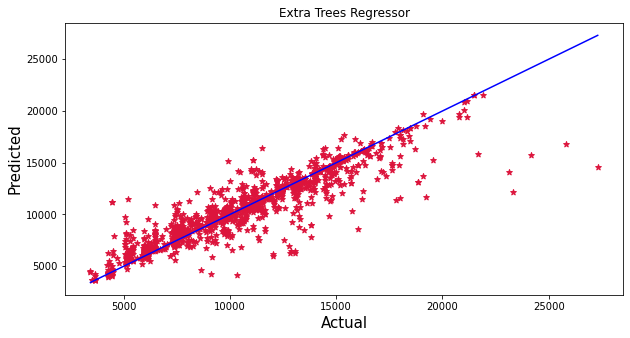

In [97]:
# Visualizing actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson',marker="*")
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Extra Trees Regressor")
plt.show()

The graph shows how our final model is mapping. The plot gives the linear relation between predicted and actual price of the flight tickets. The blue line is the best fitting line which gives the actual values/data and red dots gives the predicted values/data.

In [98]:
# Saving the predicted car price values in csv file
Predicted_Flight_Ticket_Price.to_csv("Predicted_Flight_Ticket_Price.csv",index=False)

## Conclusion

The case study aims to give an idea of applying Machine Learning algorithms to predict the price of the flight tickets. After the completion of this project, we got an insight of how to collect data, pre-processing the data, analyze the data, cleaning the data and building a model.
* First we collected the flights data from website www.yatra.com and it was done by using Web scraping. The framework used for web scraping was Selenium, which has an advantage of automating our process of collecting data. We collected almost 5303 of data which contained the ticket price of the flights and other related features. Then, the scrapped data was saved in a excel file so that we can use further and analyse the data.
* Then we loaded the dataset and have done data cleaning, EDA process and pre-processing techniques like checking outliers, skewness, correlation, scaling data etc and got better insights from data visualization.
* From the visualizations we have done some analysis which I have mentioned already in the EDA conclusion part. That is:

### Data Analysis

#### 1. Do airfares change frequently? Do they move in small increments or in large jumps?

Flight ticket prices change during the morning and evening time of the day. From the distribution plots we came to know that the prices of the flight tickets are going up and down, they are not fixed at a time. Also, from this graph we found prices are increasing in large amounts.

#### 2. Do they tend to go up or down over time?

Some flights are departing in the midnight having most expensive ticket prices compared to late morning flights. As the time goes the flight ticket fares increased. Also from categorical and numerical plots we found that the prices are tending to go up as the time is approaching from morning to evening.

#### 3. What is the best time to buy so that the consumer can save the most by taking the least risk?

From the categorical plots (bar and box) we came to know that early morning and late night flights are cheaper compared to working hours.

#### 4. Does price increase as we get near to departure date?

From the categorical plots we found that the flight ticket prices increases as the person get near to departure time. That is last minute flights are very expensive.

#### 5. Is Indigo cheaper than Jet Airways?

From the bar plot we got to know that both Indigo and Spicejet airways almost having same ticket fares.

#### 6. Are morning flights expensive?

Not all flights are expensive during morning, only few flights departing in the midnight are expensive. Apart from this the flight ticket fares are less compared to other timing flight fares.

### Key Findings and Conclusion of the Study:

* After separating our train and test data, we started running different machine learning regression algorithms to find out the best performing model on the basis of different metrics like R2 Score, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error. We tried many algorithms like Decision Tree Regressor, Random Forest Regressor, Extra Trees Regressor, GradientBoosting Regressor, Extreme Gradient Boosting Regressor (XGBoost), Bagging Regressor.
* We got Extra Trees Regressor as the best model among all the models as it was giving high R2 score and the low evaluation metrics compared to other models. On this basis we performed the Hyperparameter tuning to finding out the best parameter and improving the scores. The R2 score increased after tuning. So we concluded that Extra Trees Regressor as the best algorithm as it was giving high R2 score after tuning.
* After that we saved the model in a pickle with a file name in order to use whenever we require. Then we loaded the saved file and predicted the values.
* Overall, we can conclude that Extra Trees Regressor is the best working algorithm model we obtained. We can improve the data and R2 score by adding some more features to the dataset.